### Insurance premium prediction project  

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns 
print("libraries imported")

libraries imported


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# finding duplicates record 
print("Duplicate records : ",df.duplicated().sum())

Duplicate records :  1


In [6]:
# checking missing value 
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.columns  = ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']


In [11]:
df.head(2)

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [12]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [13]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
df['charges'].min()

1121.8739

In [16]:
df['charges'].max()

63770.42801

In [17]:
df['charges'].mean()


13270.422265141257

In [19]:
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']


In [23]:
print("Female charges : ",female['charges'].mean())
print("Male charges : ",male['charges'].mean())

Female charges :  12569.578843835347
Male charges :  13956.751177721893


In [25]:
female['smoker'].value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [26]:
male['smoker'].value_counts()


smoker
no     517
yes    159
Name: count, dtype: int64

In [33]:
print("Total Girls : ", female.shape[0]) 
print("Total Boys : ", male.shape[0] )
     

Total Girls :  662
Total Boys :  676


In [39]:
average_charges = female['charges'].mean()
df2 = female[female['charges'] <= average_charges]
df2.head()

,age,gender,bmi,child,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [40]:
print("Total Girls : ", df2.shape[0]) 

Total Girls :  441


In [41]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [42]:
average_charges = male['charges'].mean()
df3 = male[male['charges'] <= average_charges]
df3.head()

,age,gender,bmi,child,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
8,37,male,29.83,2,no,northeast,6406.4107
10,25,male,26.22,0,no,northeast,2721.3208


In [43]:
print("Total Mail : ", df3.shape[0]) 


Total Girls :  466


In [44]:
df3['smoker'].value_counts()


smoker
no     464
yes      2
Name: count, dtype: int64

### Male condidate region charges 

In [46]:
male_region = male.groupby('region')

In [47]:
male_region[['charges']].min()

,charges
region,
northeast,1694.7964
northwest,1621.3402
southeast,1121.8739
southwest,1241.5650


In [48]:
male_region[['charges']].max()


,charges
region,
northeast,48549.17835
northwest,60021.39897
southeast,62592.87309
southwest,52590.82939


In [49]:
male_region[['charges']].mean()


,charges
region,
northeast,13854.005374
northwest,12354.119575
southeast,15879.617173
southwest,13412.883576


In [50]:
male_region['charges'].agg(min_charges="min",max_charges='max',mean_charges='mean')

,min_charges,max_charges,mean_charges
region,,,
northeast,1694.7964,48549.17835,13854.005374
northwest,1621.3402,60021.39897,12354.119575
southeast,1121.8739,62592.87309,15879.617173
southwest,1241.5650,52590.82939,13412.883576


## Female condidate region chargs min , max , mean 

In [52]:
female_region = female.groupby('region')
female_group_analysis = female_region['charges'].agg(min_charges="min",max_charges='max',mean_charges='mean')
female_group_analysis

,min_charges,max_charges,mean_charges
region,,,
northeast,2196.47320,58571.07448,12953.203151
northwest,2117.33885,55135.40209,12479.870397
southeast,1607.51010,63770.42801,13499.669243
southwest,1727.78500,48824.45000,11274.411264


In [57]:
female_regions = list(female_group_analysis['mean_charges'].index)
female_regions

['northeast', 'northwest', 'southeast', 'southwest']

In [60]:
average_charges = list(female_group_analysis['mean_charges'].values)
average_charges

[12953.203151298138,
 12479.870396585366,
 13499.669242914284,
 11274.411263641974]

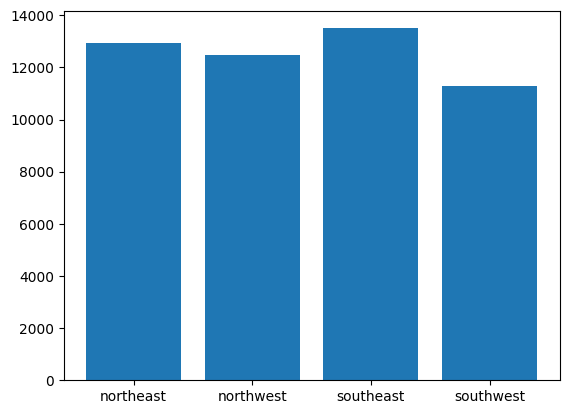

In [67]:
plt.bar(female_regions,average_charges)
plt.show()

In [68]:
#### assignment 
# feature engineering  
# < 18.5   ==> underweight 
# 18.5 to 24.9  ==> HealthyWeight 
# 25.0 to 29.9  ==> overweight
# 30 > "obese"

## underweight , HealthyWeight , overweight

# health_category 

In [71]:
df

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
